# Euclidean distance for outlier removal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Z distance')

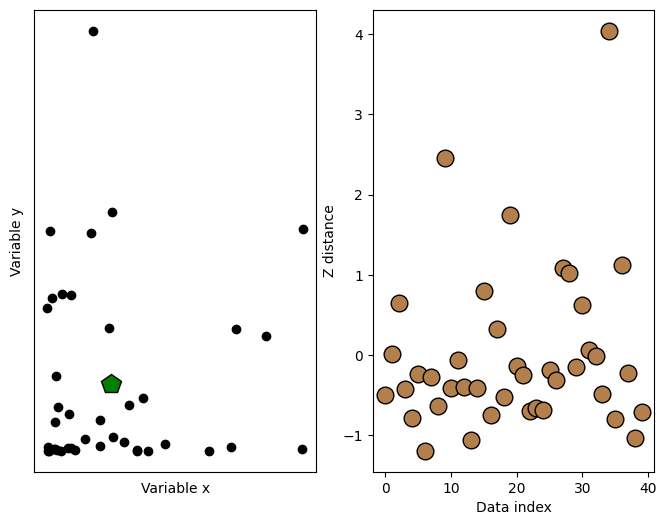

In [2]:
## create some data

N = 40

# two-dimensional data
d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))
datamean = [ np.mean(d1), np.mean(d2) ]


# compute distance of each point to the mean
ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt( (d1[i]-datamean[0])**2 + (d2[i]-datamean[1])**2 )
    

# convert to z (don't need the original data)
ds = (ds-np.mean(ds)) / np.std(ds)





# plot the data
fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].plot(d1,d2,'ko',markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

# plot the multivariate mean
ax[0].plot(datamean[0],datamean[1],'kp',markerfacecolor='g',markersize=15)

# then plot those distances
ax[1].plot(ds,'ko',markerfacecolor=[.7, .5, .3],markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

[34]


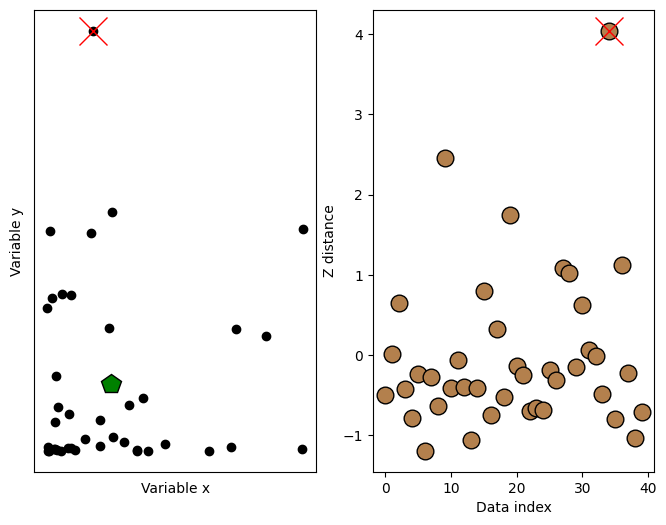

In [3]:
## now for the thresholding

# threshold in standard deviation units
distanceThresh = 2.5

# find the offending points
oidx = np.where(ds>distanceThresh)[0]

print(oidx)


# and cross those out
ax[1].plot(oidx,ds[oidx],'x',color='r',markersize=20)
ax[0].plot(d1[oidx],d2[oidx],'x',color='r',markersize=20)

fig